<a href="https://colab.research.google.com/github/PRADEEPBALU/PLACEMENT-PREDICTION-SYSTEM/blob/main/Placement_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MINI PROJECT ON PLACEMENT PREDICITON SYSTEM USING LOGISTIC REGRESSION AND RANDOM FOREST**

**DATA UNDERSTANDING:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

**2.1 GATHERING DATA:**

In [ ]:
#load the dataset
df=pd.read_csv("Placement_Data_Full_Class.csv")

In [ ]:
#see the 5 first data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [ ]:
#check datatype or null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
#see some statics data
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**2.2 CLEANING OF DATA :**

In [ ]:
#check number of rows and columns
print(df.shape[0]) #no of rows
print(df.shape[1]) #no of columns

215
15


In [ ]:
# check null values in df
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
#fill salary null value with mode 
df["salary"]=df["salary"].fillna(df["salary"].mean())

In [ ]:
#check datatypes
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

only salary Column has 67 null values
so we delete or replace this null value with some value like mean, median or 0.

Salary null value fill with salary mean value because it is average of salary column and it gives better performance in prediction time if use this column. 

**2.3 HANDLING WITH CATAGORICAL DATA:**

In [ ]:
# we convert object type data into numerical datatype
    
df['gender']=df['gender'].astype('category')
df['status']=df['status'].astype('category')
df['workex']=df['workex'].astype('category')
df['hsc_b']=df['hsc_b'].astype('category')
df['ssc_b']=df['ssc_b'].astype('category')

In [ ]:
#check how many unique data in these dataframe

print(df['gender'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['hsc_b'].unique())
print(df['ssc_b'].unique())

['M', 'F']
Categories (2, object): ['M', 'F']
['Placed', 'Not Placed']
Categories (2, object): ['Placed', 'Not Placed']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Others', 'Central']
Categories (2, object): ['Others', 'Central']
['Others', 'Central']
Categories (2, object): ['Others', 'Central']


In [ ]:
# Replace the value in 0,1 or quantitative parameters
df["gender"].replace(["F","M"],[0,1],inplace=True)
df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)

df['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
df['workex'].replace(to_replace ="No", value =0,inplace=True)

In [ ]:
df["gender"].dtype


dtype('int64')

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.000000
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.000000
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.000000
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,288655.405405
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.000000


In [ ]:
#create a new dataframe of only numerical values
numerical_df=df.select_dtypes(["float64","int64"])

**3. VISUALIZING THE DATA:**

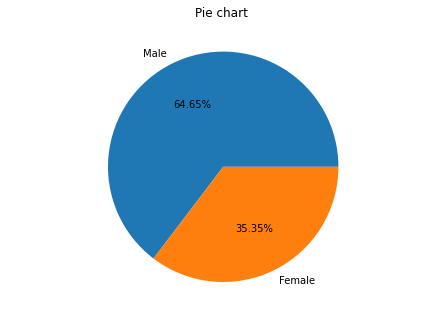

In [ ]:
# show the percentage of male or female
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = ['Male','Female']
students = [139,76]
ax.pie(students, labels = gender,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

Number of not placed Student 67
Number of placed Student 148


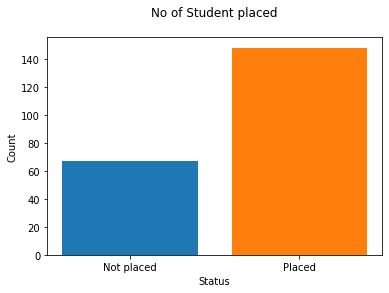

In [ ]:
#show the no. of student how placed or not placed.

print("Number of not placed Student "+ str(len(df[df["status"]==0])))
print("Number of placed Student "+ str(len(df[df["status"]==1])))

plt.bar([0],height=len(df[df["status"]==0]))
plt.bar([1],height=len(df[df["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))
plt.title("No of Student placed\n")
plt.show()

scc_p mean = 67.3033953488372
hsc_p mean = 66.33316279069766
mba_p mean = 62.278186046511586
degree_p mean = 66.37018604651163


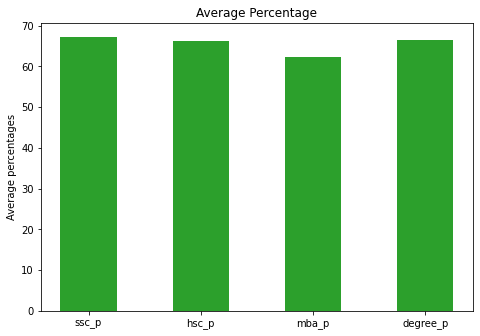

In [ ]:
#average percentage of all education qualification
values = [(numerical_df['ssc_p'].mean()),(numerical_df['hsc_p'].mean()),(numerical_df['mba_p'].mean()),(numerical_df['degree_p'].mean())]
print('scc_p mean = ' +str(numerical_df['ssc_p'].mean()))
print('hsc_p mean = ' +str(numerical_df['hsc_p'].mean()))
print('mba_p mean = ' +str(numerical_df['mba_p'].mean()))
print('degree_p mean = ' +str(numerical_df['degree_p'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

**Questions 1.**
**Which factor influenced a candidate in getting placed?**
**or** 


**Does percentage matters for one to get placed?**

In [ ]:
#show the relation between diffrent qualification placement status usinng correlation.

print('ssc_p to placement ', round(numerical_df['status'].corr(numerical_df['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(numerical_df['status'].corr(numerical_df['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(numerical_df['status'].corr(numerical_df['mba_p'])*100,1),'%')
print('degree_p to placement ', round(numerical_df['status'].corr(numerical_df['degree_p'])*100,1),'%')
print('etest_p to placement ', round(numerical_df['status'].corr(numerical_df['etest_p'])*100,1),'%')
#print('workexp to placement ', round(numerical_df['status'].corr(numerical_df['workexp'])*100,1),'%')

ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %


In [ ]:
df_grade = df.groupby(['status']).mean()[['hsc_p', 'degree_p', 'mba_p']].reset_index()
df_grade.head()

,status,hsc_p,degree_p,mba_p
0,0,58.395522,61.134179,61.612836
1,1,69.926554,68.740541,62.579392


In [ ]:
#Student Grades and Campus Placement
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline

trace1 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==0].drop('status', axis=1).values[0],
    name = 'Not Placed'
)

trace2 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==1].drop('status', axis=1).values[0],
    name = 'Placed'
)

data = [trace1, trace2]

layout = go.Layout(
    yaxis = dict(title = 'Grade'),
    xaxis = dict(title = 'Stage'),
    title = 'Student Grades and Campus Placement')
fig = go.Figure(data=data, layout=layout)
fig.show()

**2.Question**
**what is the percentage of female or male how get the placement?** 

In [ ]:
def count_genderwise_status(gender=0,status=0):
    '''
    dtype(int,boolen) gender : male for 1, female for 0
    dtype(int,boolen) status : placed for 1, not place for 0
    
    return : return the total number of status(placed or not placed) with respect to gender
    
    Example :
     
          if gender is female and status is placed then
          gender=0 ,placed=1
          
          count_genderwise_status(0,1)
          
          here : O for Female
                 1 for placed
          
          return int type
          
   means : 48 female has placed.

   Example 2:
          
          count_genderwise_status(1,0)
          
          here : 1 for male
                 0 for not placed
          return total number of male person who has not placed. 
    '''   
    i=0
    for j in range(len(df)):
        j=j+1
        if df['gender'][j]==gender and df['status'][j]==status:
            i+=1

    if gender==0 and status==0:
        print("Total female who don't get placement is "+str(i))
    if gender==0 and status==1:
        print("Total female who get placement is "+str(i))
    if gender==1 and status==0:
        print("Total male who don't get placement is "+str(i))
    if gender==1 and status==1:
        print("Total male who get placement is "+str(i))
    

    return i

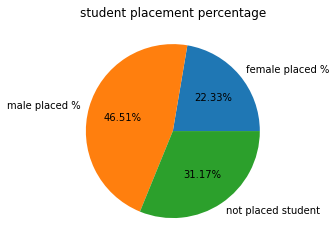

In [ ]:
#plot pie chart of placeement
plt.pie([22.33,46.51,31.17],
        labels=["female placed %","male placed %",'not placed student'],
        autopct='%1.2f%%')
plt.title('student placement percentage')
plt.show()


we see the above pie chart easly to know the percentage of the female placed percentage is 22.33%, and male placed percentage is 46.51% or not placed student percentage is 31.17%.

**Question 3.**
**Which degree specialization is much demanded by corporate?**

specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


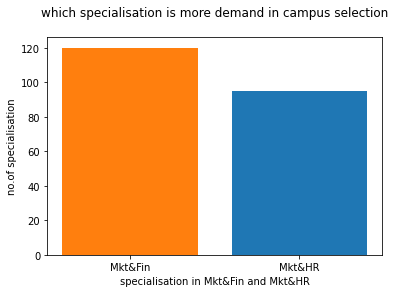

In [ ]:
# which specialisation is more demand in campus selection

plt.bar([1],height=len(df[df["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(df[df["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&Fin "+ str(len(df[df["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(df[df["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

**4 PLACEMENT PREDICTION:**




Question 4. Predictiction model using differnt ML algorithms? 

**4.0 Splitting the dataset into the Training set and Test set**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(
    df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']],
    df.status,
    test_size=0.2)

In [ ]:
len(y_train)

172

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**4.1 LOGISTIC REGRESSION MODEL :**

In [ ]:
# create a logistic regresssion model and fit it.
def lr_model(x_train,y_train,x_test,y_test):
    
    '''
    Input
      x_train :training featue
      x_test  :test featue
      y_train :training output data
      y_test  :testing  output data
      
      
    Output :
     accuracy_score       :
     classification_report:
    '''
    
    print("Using Logistic Regression Method")
    model=LogisticRegression()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)

    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))

**4.3 RANDOM FOREST CLASSIFICATION MODEL:**

In [ ]:
# Fitting Random Forest Classification to the Training set
def rfc_model(x_train,y_train,x_test,y_test):
    
    '''
    Input
      x_train :training featue
      x_test  :test featue
      y_train :training output data
      y_test  :testing  output data
      
      
    Output :
     accuracy_score       :
     classification_report:
    '''
    
    print("using Random Forest Classification method")
    model=RandomForestClassifier(n_estimators =14, criterion = 'entropy', random_state = 41)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)

    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))

**RESULT:**

In [ ]:
lr_model(x_train,y_train,x_test,y_test)

Using Logistic Regression Method
Accuracy 90.70%
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.90      0.96      0.93        28

    accuracy                           0.91        43
   macro avg       0.91      0.88      0.89        43
weighted avg       0.91      0.91      0.91        43



In [ ]:
rfc_model(x_train,y_train,x_test,y_test)

using Random Forest Classification method
Accuracy 93.02%
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.93      0.96      0.95        28

    accuracy                           0.93        43
   macro avg       0.93      0.92      0.92        43
weighted avg       0.93      0.93      0.93        43



**we can see the prediction and say that Random Forest is better** **perform then logistic regression** 
**and the accuracy score in 93.02%**